<a href="https://colab.research.google.com/github/Aroni-Ghosh/CNN-in-Tensorflow-Solutions/blob/master/mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import zipfile
import random
import shutil
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [ ]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])

Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 2.0787 - accuracy: 0.4410
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 1.1957 - accuracy: 0.7603
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.6495 - accuracy: 0.8366
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4936 - accuracy: 0.8648
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.4255 - accuracy: 0.8806
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3860 - accuracy: 0.8899
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3593 - accuracy: 0.8969
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3390 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3229 - accuracy: 0.9071
Epoch 10/10
10000/10000 [==============================

(784,)
(1, 784)
[2]
Class:  2


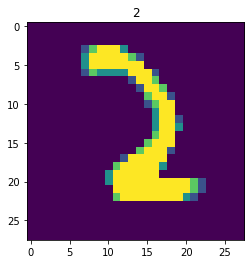

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
img = test_x[236]
print(img.shape)
test_img = img.reshape((1,784))
print(test_img.shape)
img_class = model.predict_classes(test_img)
print(img_class)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)


img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

Saving 93.jpg to 93.jpg
Saving 92.jpg to 92.jpg
Saving 91.jpg to 91.jpg
Saving 9.jpg to 9.jpg
(1, 784)
9


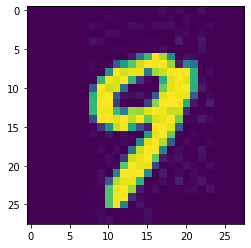

(1, 784)
9


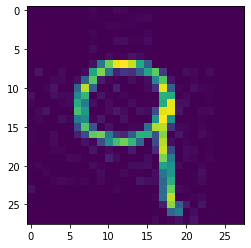

(1, 784)
4


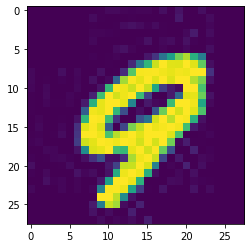

(1, 784)
9


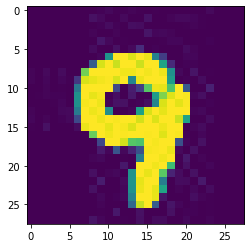

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import cv2
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28))
  
  x = image.img_to_array(img)
  images=cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
  images=images.reshape((1,784))
  print(images.shape)
  classes = model.predict_classes(images)
  print(classes[0])


  img = images.reshape((28,28))
  plt.imshow(img)
  plt.show()
  
